Use a programming language or package where decision trees can be trained and applied. Examples include Python (scikit-learn package), R or the C4.5 code available on Blackboard.

1.On any of the binary and multi-class classification datasets, using the training and test sets specified in ProjectsData.pdf, perform the following tasks:

a) For d from 1 to 12 train a decision tree of maximum depth d and report the training misclassification error in a table. (1 point)

b) On the same table report the misclassification error on the test set for all the trained trees. (1 point)

c) Plot on the same graph the training errors and test errors from a) and b) vs tree depth as two separate curves. (1 point)

The datasets with 4-fold cross-val mean that 4-fold cross-validation should be performed on that dataset.

# Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
import time

In [2]:
# for the hill valley data
#t=time.time()
path='/Users/soumak/Google Drive/computer science/machine learning/hw/hw2/hill-valley/'
hill_valley_train_x=np.array(pd.read_csv(path+'X.dat',sep=" ",header=None))
#print(time.time()-t)
# use np.loattxt is slower than pd.read_csv
# t=time.time()
# hill_valley_train_x=np.loadtxt(path+'hill_valley/X.dat',dtype=float,delimiter=' ')
# print(time.time()-t)
hill_valley_train_y=np.array(pd.read_csv(path+'Y.dat',sep=" ",header=None))
hill_valley_test_x=np.array(pd.read_csv(path+'Xtest.dat',sep=" ",header=None))
hill_valley_test_y=np.array(pd.read_csv(path+'Ytest.dat',sep=" ",header=None))

In [3]:
hill_valley_train_y.shape

(606, 1)

In [4]:
hill_valley_train_x.shape

(606, 100)

# Train the Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
train_error_list=[]
test_error_list=[]
for depth in range(1,13):
    clf= DecisionTreeClassifier(max_depth=depth)
    hill_valley_train_y.astype(int)
    clf.fit(hill_valley_train_x,hill_valley_train_y)
    #train error
    predict_train=clf.predict(hill_valley_train_x)
    #note: reshape should use the = to reform the orginal array
    #predict_train=predict_train.reshape(len(predict_train),1)
    train_error=np.average(predict_train!=hill_valley_train_y)
    # test_error
    predict_test=clf.predict(hill_valley_test_x)
    #note: reshape should use the = to reform the orginal array
    #predict_test=predict_test.reshape(len(predict_test),1)
    test_error=np.average(predict_test!=hill_valley_test_y)
    train_error_list.append(float(train_error))
    test_error_list.append(float(test_error))

In [9]:
print(train_error_list)
print(test_error_list)

[0.49947717544031633, 0.4993029005870884, 0.49939003801370235, 0.49939003801370235, 0.4993246849437419, 0.499193978803821, 0.4992811162304349, 0.4990197039505931, 0.49915041009051403, 0.4990197039505931, 0.49925933187378146, 0.4989979195939396]
[0.5001960592098814, 0.5003921184197627, 0.5003267653498024, 0.5003049809931488, 0.5004139027764163, 0.5004356871330697, 0.5003703340631093, 0.5007406681262185, 0.5006535306996046, 0.500806021196179, 0.5005663932729907, 0.5007624524828721]


In [10]:
%matplotlib inline

In [15]:
x = [n for n in range(12)]

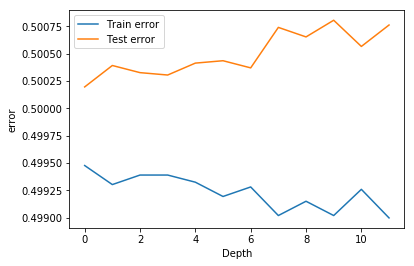

In [16]:
plt.plot(x, train_error_list, label='Train error')
plt.plot(x, test_error_list, label='Test error')
plt.ylabel('error')
plt.xlabel('Depth')
plt.legend(loc='upper left')
plt.show()